In [18]:
username = "Alex"
env = "bifurcation"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`


In [19]:
using BifurcationKit, Setfield, LinearAlgebra, Plots, Parameters

In [20]:
function model_braint_rhythms(u, p)

    sE, sI, rE, rI, Y = u
    τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, gammaY, ythr, sEthr, kY = p

    g(Y) = 1 + gammaY / (1 + exp(-Y + ythr))
    HevY(sE) = 1/(1 + exp(-(sE - sEthr)/kY))

    dsEdt = (1/τsE) *(-sE + γE*rE*(1-sE)*g(Y) + s0E)
    dsIdt = (1/τsI) *(-sI + γI*rI*(1-sI) + s0I)

    drEdt = (1/ τrE) *(-rE + 1/(1 + exp(-kE*((IE + wEE*sE-wIE*sI) -  θE))))
    drIdt = (1/τrI) *(-rI + 1/(1 + exp(-kI*((II + wEI*sE-wII*sI) - θI))))
    
    dYdt = -Y / τY + βY * HevY(sE)
    
    return [dsEdt, dsIdt, drEdt, drIdt, dYdt]
end

model_braint_rhythms (generic function with 1 method)

In [21]:
τsE_ = 3.0; γE_ = 4.0; s0E_ = 0.15;
τsI_ = 10.0; γI_ = 8.0; s0I_ = 0.1;

τrE_ = 2.0; kE_ = 5.0; IE_ = 0.9; wEE_ = 3.5; wIE_ = 5.0; θE_ = 0.2;
τrI_ = 6.0; kI_ = 5.0; II_ = 0.0; wEI_ = 5.0; wII_ = 3.0; θI_ = 0.4;

τY_ = 0.01;  βY_ = 0.01;
ythr_ = 0.5; sEthr_ = 0.5; kY_ = 0.01
γY_ = 0.0

0.0

In [22]:
param =  (τsE = τsE_, γE = γE_, s0E = s0E_, τsI = τsI_, γI = γI_,
         s0I = s0I_, τrE = τrE_, kE = kE_, IE = IE_, wEE = wEE_, wIE = wIE_,
        θE = θE_, τrI = τrI_, kI = kI_, II = II_, wEI = wEI_, wII = wII_, θI = θI_, τY = τY_, βY = βY_, γY = γY_, ythr = ythr_, sEthr = sEthr_, kY = kY_)

(τsE = 3.0, γE = 4.0, s0E = 0.15, τsI = 10.0, γI = 8.0, s0I = 0.1, τrE = 2.0, kE = 5.0, IE = 0.9, wEE = 3.5, wIE = 5.0, θE = 0.2, τrI = 6.0, kI = 5.0, II = 0.0, wEI = 5.0, wII = 3.0, θI = 0.4, τY = 0.01, βY = 0.01, γY = 0.0, ythr = 0.5, sEthr = 0.5, kY = 0.01)

In [23]:
fp0 = [0.2522329213720189, 0.45021724371685473, 0.034179400342014936, 0.07962627958826166, 1.7362509463131359e-15];

In [24]:
prob_rate = BifurcationProblem(model_braint_rhythms, fp0, param, (@lens _.s0I))

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: s0I

In [25]:
opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 10.0, 0.0

(10.0, 0.0)

In [26]:
opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 0.0
  pMax: Float64 10.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [27]:
opt_new

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-6
  maxIter: Int64 3
  verbose: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}
  linesearch: Bool false
  α: Float64 1.0
  αmin: Float64 0.001


In [28]:
br = continuation(prob_rate, PALC(), opts_con)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 100
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter s0I starts at 0.1, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1,     hopf at s0I ≈ +0.33191664 ∈ (+0.32307438, +0.33191664), |δp|=9e-03, [converged], δ = (-2, -2), step =  17, eigenelements in eig[ 18], ind_ev =   2
- #  2, endpoint at s0I ≈ +10.00000000,                                                                     step =  99


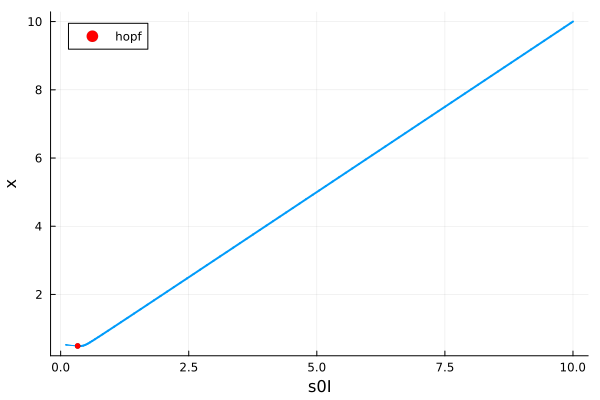

In [29]:
plot(br)

In [30]:
hp_codim2_1 = continuation(br, 1, (@lens _.IE),
	ContinuationPar(opts_con, pMin = -100.0, pMax = 100.0,
		ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━


──▶ convergence of initial guess = OK

──▶ parameter = 0.9, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.9000066666666667, initial step (bis)
Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter IE = 9.0000e-01 ⟶  9.0138e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 9.0000e-01 ⟶  9.0138e-01
──> Computed 4 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2072630311404026, -7.4869487978616265, 0)
              ──> (0.20700409596699185, -7.490961697843664, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter IE = 9.0138e-01 ⟶  9.0307e-01 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter IE = 9.0138e-01 ⟶  9.0307e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.20700409596699185, -7.490961697843664, 0)
              ──> (0.2066876197404183, -7.4958017648163375, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.8333e-03
Parameter IE = 9.0307e-

IE = 9.2956e-01 ⟶  9.3999e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.20178314884536977, -7.564826829985455, 0)
              ──> (0.19987778181998223, -7.58825060876828, 0)
───────────────────────────────────────────────────────
Continuation Step 8 
Step size = 9.2050e-03
Parameter IE = 9.3999e-01 ⟶  9.5274e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 9.3999e-01 ⟶  9.5275e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.19987778181998223, -7.58825060876828, 0)
              ──> (0.19756639026042455, -7.613972613063856, 0)
───────────────────────────────────────────────────────
Continuation Step 9 
Step size = 1.1251e-02
Parameter IE = 9.5275e-01 ⟶  9.6833e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 9.5275e-01 ⟶  9.6834e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (

-100.0 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = -0.05, p = 1.804528006317387, #reverse = 0
────> event ∈ (1.6645137681256985, 1.804528006317387), precision = 1.400E-01
Predictor:  Secant

────> eve (current) (0.05228359726727884, 6.541937390438056, 0) ──> (0.06722366799687525, 0.715624735837582, 0)
────> eigvals = 
3.4093824811953777e-10 - 0.06722366805652004im
3.4093824811953777e-10 + 0.06722366805652004im
-0.22180242801377034 + 0.0im
-0.9172183595687136 + 0.0im
-100.0 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = -0.025, p = 1.734543964340369, #reverse = 0
────> event ∈ (1.6645137681256985, 1.734543964340369), precision = 7.003E-02
Predictor:  Secant

────> eve (current) (0.06722366799687525, 0.715624735837582, 0) ──> (0.07396430617781827, -0.8888810859242442, 0)
────> eigvals = 
2.567218145944211e-6 - 0.07396119651665077im
2.567218145944211e-6 + 0.07396119651665077im
-0.2253038341465836 + 0.0im
-0.913

───────────────────────────────────────────────────────
Continuation Step 3 
Step size = -2.7500e-03
Parameter IE = 8.9439e-01 ⟶  8.9059e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 8.9439e-01 ⟶  8.9060e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.20831417857612378, -7.4702213610012125, 0)
              ──> (0.20903201009584327, -7.458679317426006, 0)
───────────────────────────────────────────────────────
Continuation Step 4 
Step size = -3.3611e-03
Parameter IE = 8.9060e-01 ⟶  8.8595e-01 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter IE = 8.9060e-01 ⟶  8.8595e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.20903201009584327, -7.458679317426006, 0)
              ──> (0.20990935583106432, -7.444082341112001, 0)
───────────────────────────────────────────────────────
Continuation Step 5 
Step size = -5.0417e-03
Parameter IE = 8.859

┌ Warning: [Codim 2 Hopf - Finalizer] The Hopf curve seems to be close to a BT point: ω ≈ 4.4446011142668346e-5. Stopping computations at (0.6469897547025969, 1.9377279889020185). If the BT point is not detected, try lowering Newton tolerance or dsmax.
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\codim2\MinAugHopf.jl:406


Parameter IE = 8.4742e-01 ⟶  8.3193e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2173282639785887, -7.308014503972537, 0)
              ──> (0.220378400982098, -7.245918438743596, 0)
───────────────────────────────────────────────────────
Continuation Step 10 
Step size = -1.3751e-02
Parameter IE = 8.3193e-01 ⟶  8.1300e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 8.3193e-01 ⟶  8.1303e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.220378400982098, -7.245918438743596, 0)
              ──> (0.22415866210618773, -7.164632648677049, 0)
───────────────────────────────────────────────────────
Continuation Step 11 
Step size = -1.6806e-02
Parameter IE = 8.1303e-01 ⟶  7.8993e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 8.1303e-01 ⟶  7.8997e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Even

Predictor:  Secant
──> Event values: (0.4709235921865295, -3.3412155272756596, 0)
              ──> (0.4840202135116843, -3.3674779982633543, 0)
───────────────────────────────────────────────────────
Continuation Step 26 
Step size = -9.1139e-02
Parameter IE = 3.9240e-02 ⟶  -1.0902e-03 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = 3.9240e-02 ⟶  2.1437e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.4840202135116843, -3.3674779982633543, 0)
              ──> (0.49205506142980937, -3.369817855638953, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = -9.6203e-02
Parameter IE = 2.1437e-03 ⟶  -3.6993e-02 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = 2.1437e-03 ⟶  -3.5756e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.49205506142980937, -3.369817855638953, 0)
              ──> (0.49499860227828

Predictor:  Secant
──> Event values: (0.49291012032748543, -3.2015161998963384, 0)
              ──> (0.4863171158160968, -3.0185304811405667, 0)
───────────────────────────────────────────────────────
Continuation Step 30 
Step size = -1.0000e-01
Parameter IE = -1.1689e-01 ⟶  -1.5823e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -1.1689e-01 ⟶  -1.6053e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.4863171158160968, -3.0185304811405667, 0)
              ──> (0.4758034993516788, -2.77883614973621, 0)
───────────────────────────────────────────────────────
Continuation Step 31 
Step size = -1.0000e-01
Parameter IE = -1.6053e-01 ⟶  -2.0415e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -1.6053e-01 ⟶  -2.0691e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.4758034993516788, -2.77883614973621, 0)
              ──> (0.461802716072

Step size = -1.0000e-01
Parameter IE = -5.8750e-01 ⟶  -6.5923e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -5.8750e-01 ⟶  -6.6563e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.29946286702183095, 1.0632348186086595, 0)
              ──> (0.2613741196827658, 2.451487139598152, 0)
───────────────────────────────────────────────────────
Continuation Step 40 
Step size = -1.0000e-01
Parameter IE = -6.6563e-01 ⟶  -7.4363e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)


Parameter IE = -6.6563e-01 ⟶  -7.5097e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2613741196827658, 2.451487139598152, 0)
              ──> (0.21943232747742303, 4.5640711571764125, 0)
───────────────────────────────────────────────────────
Continuation Step 41 
Step size = -1.0000e-01
Parameter IE = -7.5097e-01 ⟶  -8.3613e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -7.5097e-01 ⟶  -8.4382e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.21943232747742303, 4.5640711571764125, 0)
              ──> (0.17380628677576662, 8.115470336770025, 0)
───────────────────────────────────────────────────────
Continuation Step 42 
Step size = -1.0000e-01
Parameter IE = -8.4382e-01 ⟶  -9.3645e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -8.4382e-01 ⟶  -9.4340e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Sec


──> Event values: (0.010245637292440431, 2040.5045946741702, 0)
              ──> (0.004151142674741015, 12606.880667594727, 0)
───────────────────────────────────────────────────────
Continuation Step 48 
Step size = -1.9397e-03
Parameter IE = -1.0897e+00 ⟶  -1.0908e+00 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter IE = -1.0897e+00 ⟶  -1.0897e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.004151142674741015, 12606.880667594727, 0)
              ──> (-0.004354175124913271, 11237.08592523617, 0)
──> Event detected before p = -1.0896645024291498
────> Entering [Event], indicator of 2 last events = ((1, 0), (2, 0))
────> [Bisection] initial ds = -0.0019397439652873044
────> [Bisection] state.ds = 0.0019397439652873044
──> eve (initial) (0.004151142674741015, 12606.880667594727, 0) ──> (-0.004354175124913271, 11237.08592523617, 0)

──> eigvals = 
2.1880006655481415e-7 - 0.004351925595301049im
2.1880006655481415e-7 +

Step size = -5.6722e-03
Parameter IE = -1.0623e+00 ⟶  -1.0564e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = -1.0623e+00 ⟶  -1.0564e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.048852902522772634, 92.41504852549366, 0)
              ──> (-0.05411357686096844, 75.81232591136808, 0)
───────────────────────────────────────────────────────
Continuation Step 59 
Step size = -6.9327e-03
Parameter IE = -1.0564e+00 ⟶  -1.0491e+00 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -1.0564e+00 ⟶  -1.0491e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.05411357686096844, 75.81232591136808, 0)
              ──> (-0.06004743999222673, 62.03626828099161, 0)
───────────────────────────────────────────────────────
Continuation Step 60 
Step size = -7.3178e-03
Parameter IE = -1.0491e+00 ⟶  -1.0414e+00 [guess]
──> Step Converged in 1 Nonlinear Ite

IE = -1.0221e+00 ⟶  -1.0116e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.0790907531012633, 36.73337266318683, 0)
              ──> (-0.08567317793308564, 31.60916869384164, 0)
───────────────────────────────────────────────────────
Continuation Step 64 
Step size = -1.2180e-02
Parameter IE = -1.0116e+00 ⟶  -9.9883e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -1.0116e+00 ⟶  -9.9886e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.08567317793308564, 31.60916869384164, 0)
              ──> (-0.09332176762729619, 26.935782314616077, 0)
───────────────────────────────────────────────────────
Continuation Step 65 
Step size = -1.2857e-02
Parameter IE = -9.9886e-01 ⟶  -9.8541e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = -9.9886e-01 ⟶  -9.8547e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──>

──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -8.1960e-01 ⟶  -7.8932e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.18571964785310924, 7.000004188050287, 0)
              ──> (-0.200592615933413, 5.81566294310597, 0)
───────────────────────────────────────────────────────
Continuation Step 75 
Step size = -3.4272e-02
Parameter IE = -7.8932e-01 ⟶  -7.5736e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -7.8932e-01 ⟶  -7.5819e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.200592615933413, 5.81566294310597, 0)
              ──> (-0.21588164892064457, 4.782227952011798, 0)
───────────────────────────────────────────────────────
Continuation Step 76 
Step size = -3.6176e-02
Parameter IE = -7.5819e-01 ⟶  -7.2535e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -7.5819e-01 ⟶  -7.2629e-01
──> Computed 5 eigenvalues in

────> Found at p = -0.5071040518730556 ∈ (-0.5094849702187416, -0.5071040518730556), 
			  δn = (1, 0), from p = -0.4859563390368238
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = false
──────> n_inversion >= nInversion = true
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ -0.5071040518730556 
───────────────────────────────────────────────────────
Continuation Step 84 
Step size = -5.5754e-02
Parameter IE = -5.0710e-01 ⟶  -4.6901e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -5.0710e-01 ⟶  -4.6985e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant


──> Event values: (-0.3377607309559543, -0.00328381884803175, 0)
              ──> (-0.35503207357531763, -0.40859857774032227, 0)
───────────────────────────────────────────────────────
Continuation Step 85 
Step size = -5.8851e-02
Parameter IE = -4.6985e-01 ⟶  -4.3052e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -4.6985e-01 ⟶  -4.3213e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.35503207357531763, -0.40859857774032227, 0)
              ──> (-0.37212923432704803, -0.7765863148875902, 0)
───────────────────────────────────────────────────────
Continuation Step 86 
Step size = -6.2121e-02
Parameter IE = -4.3213e-01 ⟶  -3.9232e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -4.3213e-01 ⟶  -3.9397e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.37212923432704803, -0.7765863148875902, 0)
              ──> (-0.38896626701028

Parameter IE = -1.5877e-01 ⟶  -1.1701e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -1.5877e-01 ⟶  -1.1918e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.4762821896392935, -2.7891585700942514, 0)
              ──> (-0.485845567995518, -3.006969440696638, 0)
───────────────────────────────────────────────────────
Continuation Step 94 
Step size = -9.5738e-02
Parameter IE = -1.1918e-01 ⟶  -7.7401e-02 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = -1.1918e-01 ⟶  -7.9453e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.485845567995518, -3.006969440696638, 0)
              ──> (-0.4924596252931346, -3.1865773010971052, 0)
───────────────────────────────────────────────────────
Continuation Step 95 
Step size = -1.0000e-01
Parameter IE = -7.9453e-02 ⟶  -3.7962e-02 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = 

──> Event values: (-0.36983169901000934, -3.888040108144064, 0)
              ──> (-0.3271963766085561, -4.600518206784313, 0)
───────────────────────────────────────────────────────
Continuation Step 103 
Step size = -1.0000e-01
Parameter IE = 4.1383e-01 ⟶  5.2497e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter IE = 4.1383e-01 ⟶  5.4152e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.3271963766085561, -4.600518206784313, 0)
              ──> (-0.28798621244955164, -5.504890497367049, 0)
───────────────────────────────────────────────────────
Continuation Step 104 
Step size = -1.0000e-01
Parameter IE = 5.4152e-01 ⟶  6.6691e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter IE = 5.4152e-01 ⟶  6.7544e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.28798621244955164, -5.504890497367049, 0)
              ──> (-0.2539369161973401, -6.415198017

───────────────────────────────────────────────────────
Continuation Step 111 
Step size = -1.0000e-01
Parameter IE = 1.5088e+00 ⟶  1.6487e+00 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = 1.5088e+00 ⟶  1.6488e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.10674009692765915, -5.141417748354078, 0)
              ──> (-0.08318591004997729, -2.530465628176695, 0)
───────────────────────────────────────────────────────
Continuation Step 112 
Step size = -1.0000e-01
Parameter IE = 1.6488e+00 ⟶  1.7888e+00 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter IE = 1.6488e+00 ⟶  1.7888e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.08318591004997729, -2.530465628176695, 0)
              ──> (-0.055862386017229405, 4.732013304795338, 0)
──> Event detected before p = 1.7888407464753122
────> Entering [Event], indicator of 2 last events = ((1, 0), (0,

──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.0043633141130638734, 2060.3166297995904, 0)
              ──> (-0.0012118628335446675, 26731.572097968703, 0)
───────────────────────────────────────────────────────
Continuation Step 118 
Step size = -9.6987e-04
Parameter IE = 1.9252e+00 ⟶  1.9259e+00 [guess]
Newton correction failed
Halve ds = -0.0004849359913218261
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 118 
Step size = -4.8494e-04
Parameter IE = 1.9252e+00 ⟶  1.9256e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter IE = 1.9252e+00 ⟶  1.9253e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-0.0012118628335446675, 26731.572097968703, 0)
              ──> (0.0007721738569570497, 2060.3166297995904, 0)
──> Event detected before p = 1.9252849863797872
────> Entering [Event], indicator of 2 last events = ((2, 0),

 (1, 0))
────> [Bisection] initial ds = -0.0005926995449488986
────> [Bisection] state.ds = 0.0005926995449488986
──> eve (initial) (-0.0012118628335446675, 26731.572097968703, 0) ──> (0.0007721738569570497, 2060.3166297995904, 0)

──> eigvals = 
-3.2005086586048365e-5 - 0.000573345581774061im
-3.2005086586048365e-5 + 0.000573345581774061im
-0.20494463296046572 + 0.0im
-0.9354560739065647 + 0.0im
-100.0 + 0.0im

────> eve (current) (0.0007721738569570497, 2060.3166297995904, 0) ──> (0.0007721738569570497, 26731.572097968703, 0)
────> eigvals = 
-3.2005086586048365e-5 - 0.000573345581774061im
-3.2005086586048365e-5 + 0.000573345581774061im
-0.20494463296046572 + 0.0im
-0.9354560739065647 + 0.0im
-100.0 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = 0.0002963497724744493, p = 1.9252849863797872, #reverse = 0
────> event ∈ (1.9251587331649411, 1.9252849863797872), precision = 1.263E-04
Predictor:  Secant

────> eve (current) (0.0007721738569570497, 26

 ┌─ Curve type: HopfCont
 ├─ Number of points: 147
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter IE starts at 1.92525594550947, ends at 1.9377279889020185
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at IE ≈ +1.92525595,                                                                     step =   0
- #  2,       bt at IE ≈ +1.92525595 ∈ (+1.92522693, +1.92525595), |δp|=3e-05, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at IE ≈ +1.75384823 ∈ (+1.71884511, +1.75384823), |δp|=4e-02, [converged], δ = ( 0,  0), step =   6, eigenelements in eig[  7], ind_ev =   0
- #  4,       gh at IE ≈ -0.50710405 ∈ (-0.50948497, -0.50710405), |δp|=2e-03, [converged], δ = ( 0,  0), step =  35, eigenelements in eig[ 36], ind_ev =   0
- #  5,       gh at IE ≈ -1.08981671 ∈ (-1.08987679, -1.08981671), |δp|=6e-05, [converged], δ =

In [34]:
hp_codim2_1[2]

(s0I = 0.6441371581267546, IE = 1.9251587331649411, ωₕ = -0.0012118628335446675, l1 = 26731.572097968703 - 836245.7632939651im, BT = -0.0012118628335446675, GH = 26731.572097968703, x = 0.6945849847860787, param = 1.9251587331649411, itnewton = 2, itlinear = 4, ds = -0.0009698719826436522, n_unstable = 0, n_imag = 0, stable = true, step = 1, eigenvals = ComplexF64[2.6191659993819943e-6 - 0.001195119661483794im, 2.6191659993819943e-6 + 0.001195119661483794im, -0.20496639146854073 + 0.0im, -0.9355156167197342 + 0.0im, -100.0 + 0.0im], eigenvecs = ComplexF64[0.9252612011710097 - 0.0im 0.9252612011710097 + 0.0im … -0.8744048851426144 + 0.0im 0.0 + 0.0im; 0.16150618865873645 + 0.0027260789342302147im 0.16150618865873645 - 0.0027260789342302147im … -0.0045246288975923496 + 0.0im 0.0 + 0.0im; … ; 0.05938424966097721 + 0.00030855846576633615im 0.05938424966097721 - 0.00030855846576633615im … 0.013547099421713034 + 0.0im 0.0 + 0.0im; 3.625053363052493e-14 + 4.3323724346394285e-19im 3.6250533630

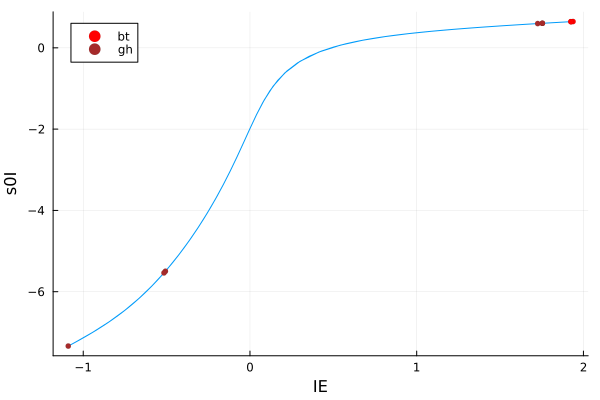

In [31]:
plot(hp_codim2_1)